 # Исследовательский анализ продаж компьютерных игр

## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## 1. Получение общей информации о данных

In [3]:
#импорт библиотек
import pandas as pd 
import matplotlib.pyplot as plt 
import math  
from scipy import stats as st  
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Рассмотрим полученную информацию подробнее.**

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных * игр и присваивает им подходящую возрастную категорию https://www.esrb.org/ratings-guide/.

Проблемы, которые нужно решать: 
- в Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating есть пропущенные значения,
- в Year_of_Release тип данных float64,
- в User_Score тип данных object



<font color='blue'> Хороший план на предобработку. </font>

## 2. Подготовка данных

In [6]:
data.corr().style.background_gradient(cmap = 'coolwarm') #просмотр корреляции и рассмотрение возможности замены пропусков

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
Year_of_Release,1,-0.0925004,0.00397783,-0.168366,0.0378202,0.011411
NA_sales,-0.0925004,1,0.765335,0.449594,0.638649,0.240755
EU_sales,0.00397783,0.765335,1,0.435061,0.722792,0.220752
JP_sales,-0.168366,0.449594,0.435061,1,0.291089,0.152593
Other_sales,0.0378202,0.638649,0.722792,0.291089,1,0.198554
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,1


В наименование игр столбца `Name` иногда встречается год, однако он не всегда соответствует дате релиза в столбце `Year_of_Release`. Замена пропусков в других столбцах корректными значениями, такюже не обнаруживается. 

Для замены пропусков в данных `year_of_release, critic_score, rating`  используем значение -1 в качестве маркера. Далее приведем к числовому типу.

Абревиатура `tbd` (To Be Determined https://www.metacritic.com/faq#item13) означает, что по конкретной игре не собрано достаточное количество отзывов. Поступим с `tbd` также, как и с остальными пропусками в числовых данных - знаменим маркером -1.

В данных типа `object` - `name, genre` - пропуски заменим на `noname`.

In [7]:
data.columns = (data.columns).str.lower() #приведение названий столбцов к нижнему регистру

In [8]:
data.columns #имена столбцов

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<font color='blue'> Все верно. </font>

In [9]:
data['user_score'].unique() #список уникальных значений пользовательского рейтинга

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
data['year_of_release'] = data['year_of_release'].fillna(-1) #замена пропусков маркером
data['year_of_release'] = data['year_of_release'].astype(int) #приведение к типу int

<font color='blue'> Хорошо, только надо понимать, что заполнение -1 в данном случае равносильно удалению. Т.к. весь дальнейший анализ будет вестись в разрезе годов релиза. </font>

In [11]:
data['year_of_release'].unique() #список уникальных значений даты релиза

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000,   -1, 1995,
       1991, 1981, 1987, 1980, 1983])

In [12]:
data['name'] = data['name'].fillna("noname") #список уникальных значений даты релиза
data['genre'] = data['genre'].fillna("noname")

In [13]:
data['critic_score'] = data['critic_score'].fillna(-1)#замена пропусков маркером

In [14]:
data['critic_score'].unique() #список уникальных значений даты релиза

array([76., -1., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [15]:
data['user_score'] = data['user_score'].str.replace('tbd','-1')  #замена пропусков маркером
data['user_score'] = data['user_score'].astype('float') #приведение к типу float
data['user_score'] = data['user_score'].fillna(-1) #замена пропусков маркером

In [16]:
data['user_score'].unique() #список уникальных значений даты релиза

array([ 8. , -1. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,  4.9,
        4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,  4.4,
        4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,  2.5,
        1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,  3.8,
        0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

In [17]:
data['rating'] = data['rating'].fillna('-1')  #замена пропусков маркером

<font color='blue'> Хорошо, замена пропусков выполнена верно. </font>

Рассчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец `total_sales`

In [18]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] #суммирование продаж

<font color='blue'> Целевой параметр рассчитан правильно. </font>

In [19]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,-1,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,-1,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,-1,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,-1,0.01


<font color='blue'> Ок, можно переходить к анализу. </font>

## 3. Исследовательский анализ данных

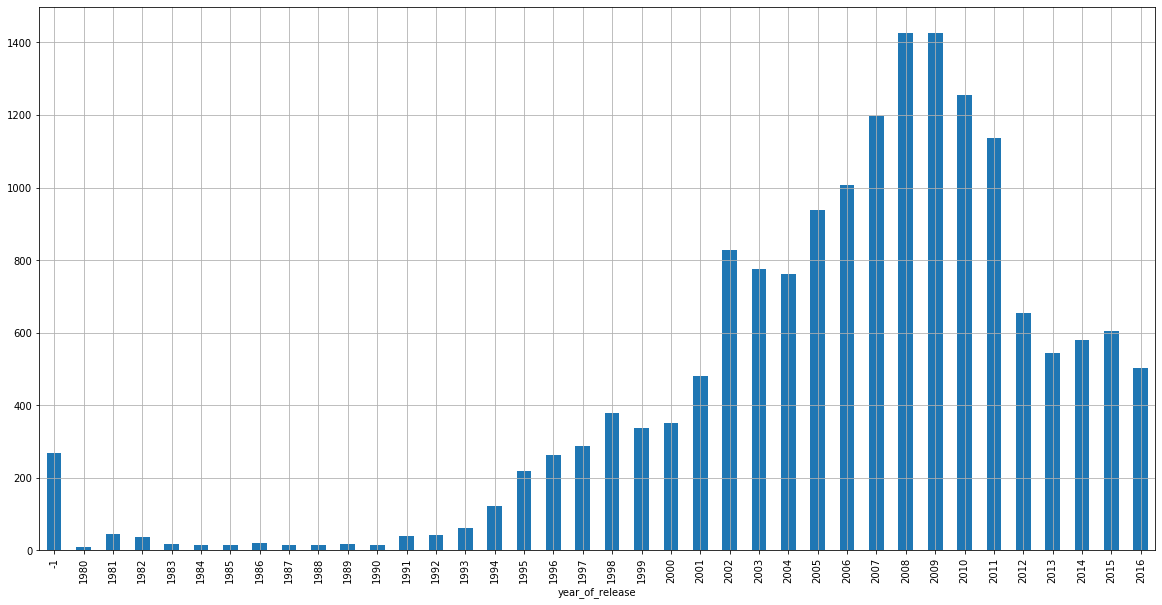

In [20]:
(data
    .groupby('year_of_release')['name'].count()
    .plot(y='platform', style='o-', figsize=(20,10), grid=True, kind='bar' )
) #построение столбчатого графика количества игр с разбивкой по годам релиза      

In [21]:
data.groupby('year_of_release')['name'].count() #количество игр выходивших в разные годы

year_of_release
-1        269
 1980       9
 1981      46
 1982      36
 1983      17
 1984      14
 1985      14
 1986      21
 1987      16
 1988      15
 1989      17
 1990      16
 1991      41
 1992      43
 1993      62
 1994     121
 1995     219
 1996     263
 1997     289
 1998     379
 1999     338
 2000     350
 2001     482
 2002     829
 2003     775
 2004     762
 2005     939
 2006    1006
 2007    1197
 2008    1427
 2009    1426
 2010    1255
 2011    1136
 2012     653
 2013     544
 2014     581
 2015     606
 2016     502
Name: name, dtype: int64

Максимальное количество игр выходило в 2008, 2009 годах. Наблюдаем дальнейших спад, предположительно связаный с мировым кризисом 2008 года и замедлением роста мировой экономики. 

Период с 2012 по 2016 годов число игр почти не меняется. Что может говорить о том, что в интересующем нас 2017г больших изменений не будет. 

Количество игр, выходивших ежегодно в период с 1980 по 1993, находится в пределах от 14 до 62. Цифры незначительные, для текущего анализа интереса не представляют.

<font color='blue'> Хорошо, все верно. </font>

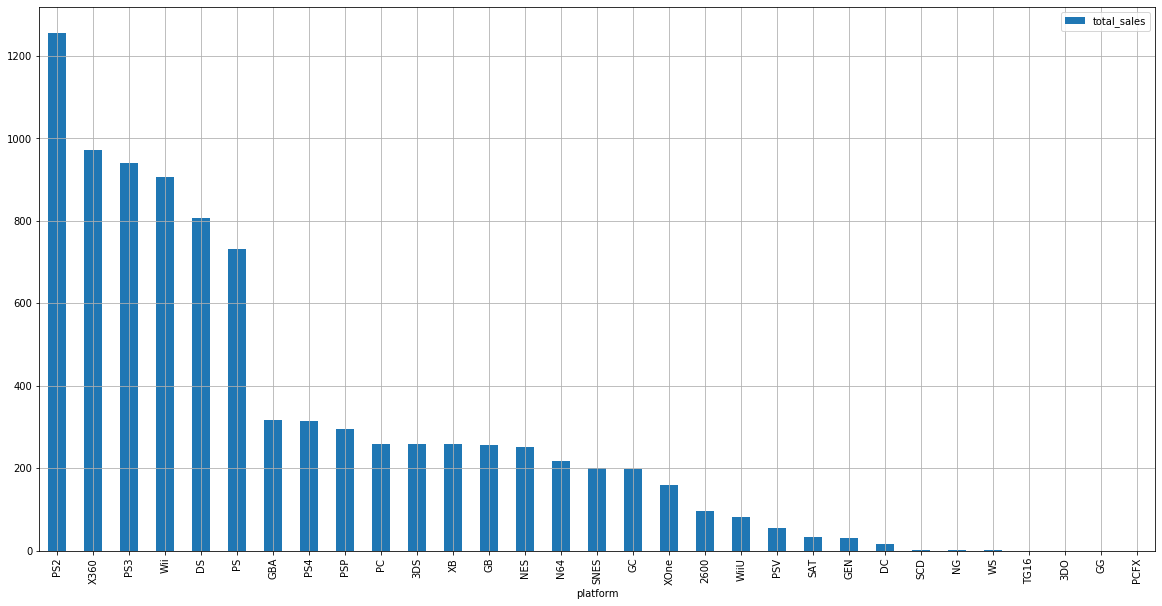

In [22]:
platforms=(data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
          )
platforms.plot(y='total_sales', style='o-', figsize=(20,10), grid=True, kind='bar' ) #столбчатый график с наибольшими суммарными продажами 

Выделим топ-6 платформ с наибольшими продажами

In [23]:
top_platform = platforms.head(6)
top_platform # топ-6 платформ по продажам

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86


<font color='blue'> Платформы получены правильно. </font>

Составим столбчатые графики для каждой платформы из топ-6, которые покажут распределение сумарных продаж по годам. По оси абсцисс будет указаны годы, в течении которых, платформа существовала (характерный срок существования платформы).

Платформа PS2 имеет характерный срок в 12 лет
Платформа X360 имеет характерный срок в 12 лет
Платформа PS3 имеет характерный срок в 11 лет
Платформа Wii имеет характерный срок в 11 лет
Платформа DS имеет характерный срок в 11 лет
Платформа PS имеет характерный срок в 10 лет


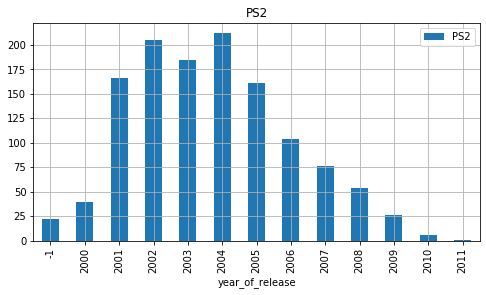

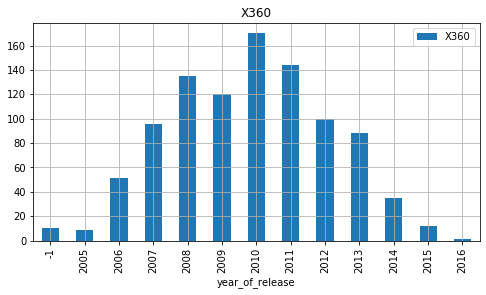

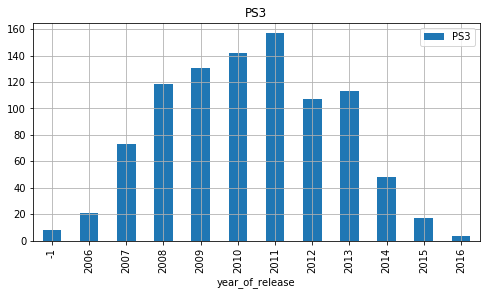

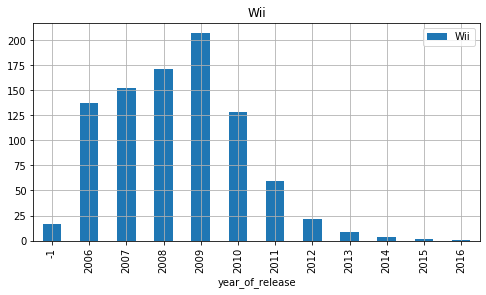

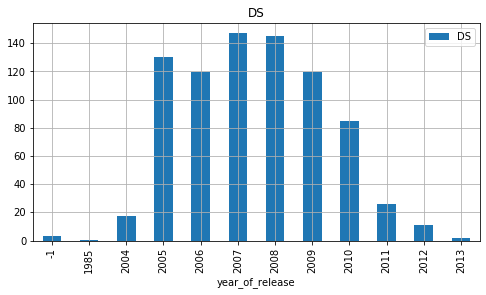

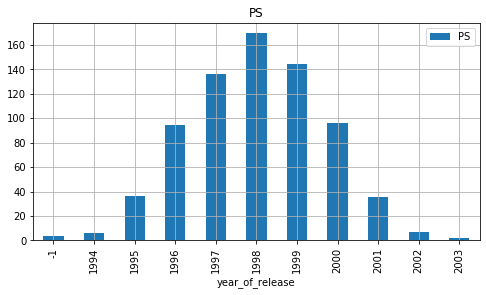

In [24]:
a=['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'] # цикл для построения графиков 
for name in a:
    b = (data
    .loc[data.loc[:, 'platform'] == name]
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    )
    b.plot(title=name, y=name, style='o-', figsize=(8,4), grid=True, kind='bar')
    print("Платформа", name, "имеет характерный срок в", (len(b)-1), "лет")

**Примем срок существования платформы в 10 лет**. 

Проанализируем продажи платформ за 9 летний период с 2008 по 2016, с целью обнаружения тенденций к интересующему 2017году

<font color='blue'> Жизненный цикл определн верно. Актуальный период великоват в него попадет много неактуальных платформ. Актуальный период лучше было взять как половина жизненного цикла, т.к. нас интересуют платформы, которые на подъеме или на пике популярности. </font>

In [25]:
ten_period = data.query('year_of_release > 2007') # срез данных с 2007 года


In [26]:
ten_period['platform'].unique() #уникальные платформы

array(['Wii', 'X360', 'PS3', 'DS', 'PS4', '3DS', 'PC', 'XOne', 'WiiU',
       'PSP', 'PS2', 'PSV', 'XB', 'DC'], dtype=object)

Определим актуальные платформы с помощью столбчатых графиков, отражающих распределение продаж по каждой платформе существовавшей с 2008 года.

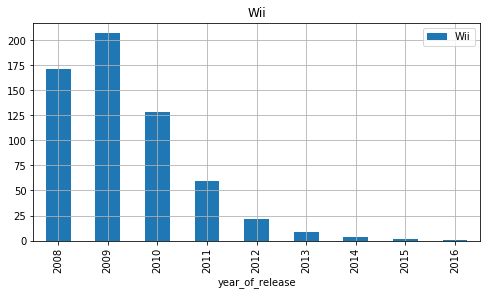

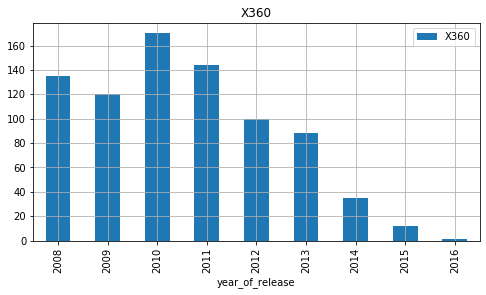

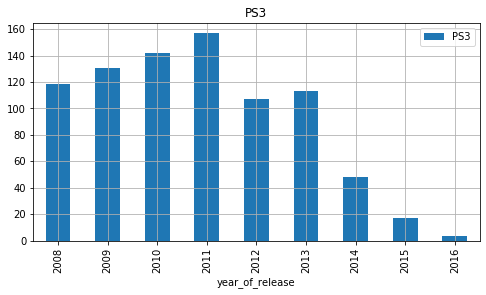

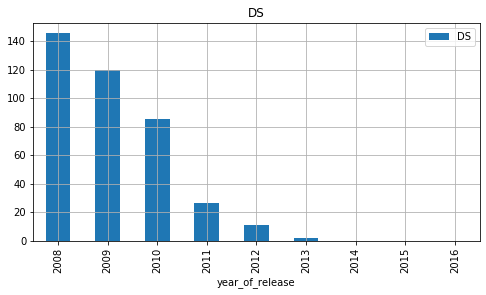

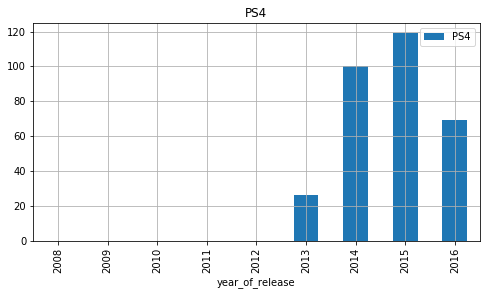

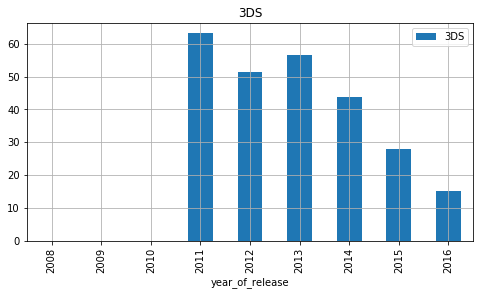

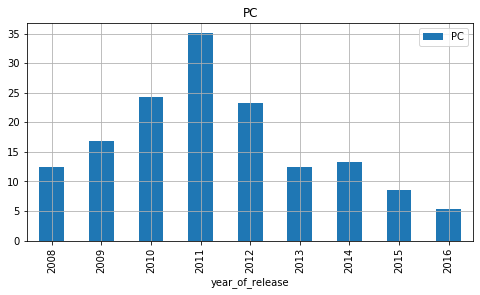

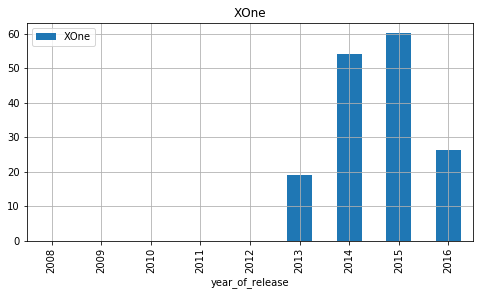

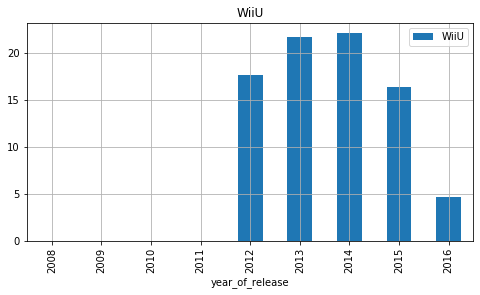

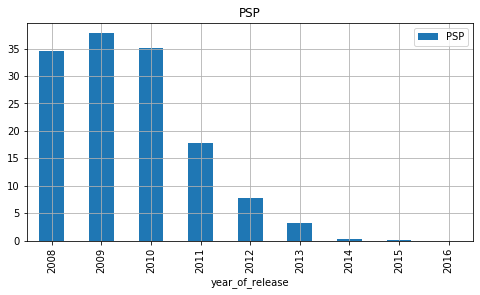

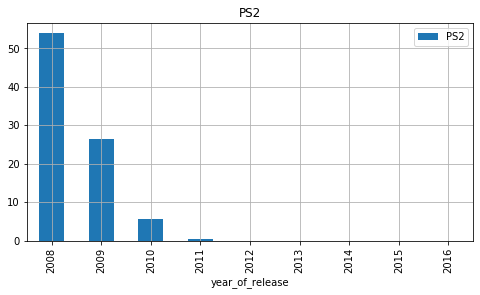

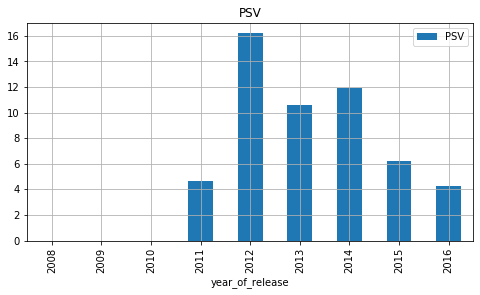

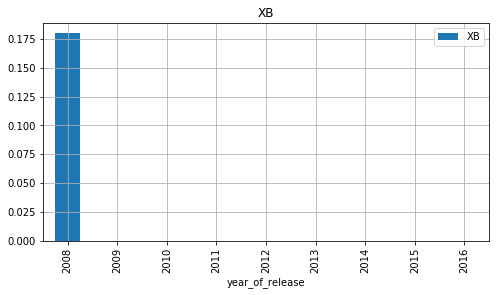

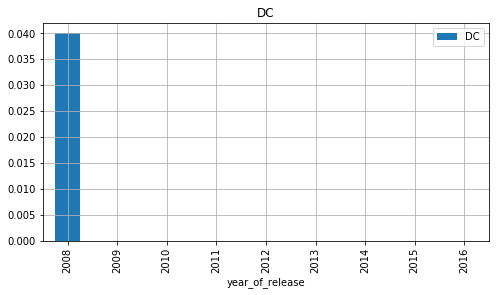

In [27]:
a=['Wii', 'X360', 'PS3', 'DS', 'PS4', '3DS', 'PC', 'XOne', 'WiiU',
       'PSP', 'PS2', 'PSV', 'XB', 'DC']
for name in a: # цикл для построения графиков 
    b = (ten_period
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    )
    b.plot(title=name, style='o-', y=name, figsize=(8,4), grid=True, kind='bar')

С 2015 по 2016 наблюдается падение продаж по всем платформам. **Актуальный период выберем с 2015 по 2016 годы.**


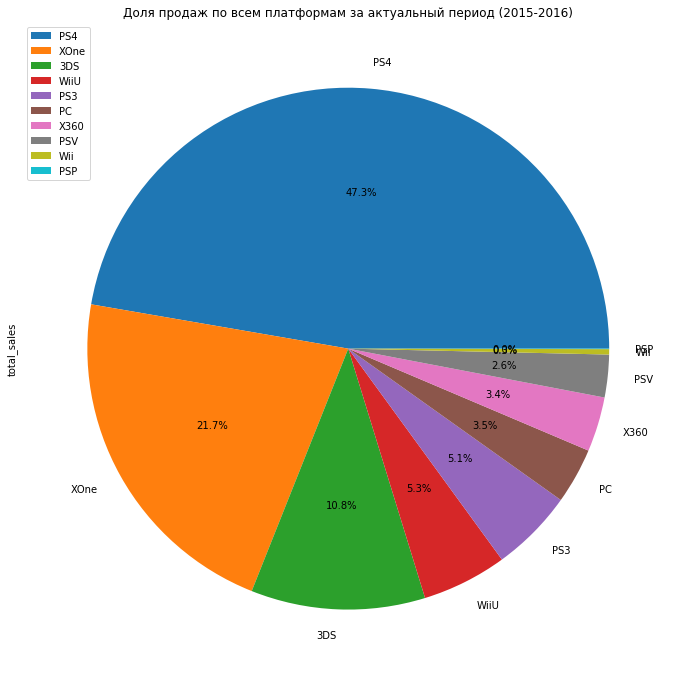

In [28]:
relevant_period=data.query('year_of_release > 2014') #построение круговой диаграммы продаж по всем платформам за 2015-2016
(relevant_period
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)                 
    .plot(title='Доля продаж по всем платформам за актуальный период (2015-2016)', y='total_sales', 
                    kind='pie', autopct='%1.1f%%', figsize=(12, 12))
)


<font color='blue'> Ок, вот здесь уже видны актуальные платформы. </font>

In [29]:
relevant_platforms_sales=(relevant_period
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)  
    .head(3)
)
relevant_platforms_sales

,total_sales
platform,
PS4,188.15
XOne,86.29
3DS,42.92


**Платформы ``PS4, XOne, 3DS`` являются самыми прибыльными за актуальный период (2015-2016) и обладают наибольшим  потенциалом высокой прибыльности на 2017 год.**

In [30]:
# сохраним актуальные платформвы в relevant_platforms
relevant_platforms=(data 
     .query('platform in @relevant_platforms_sales.index')
     .sort_values(by='total_sales', ascending=False)  
)

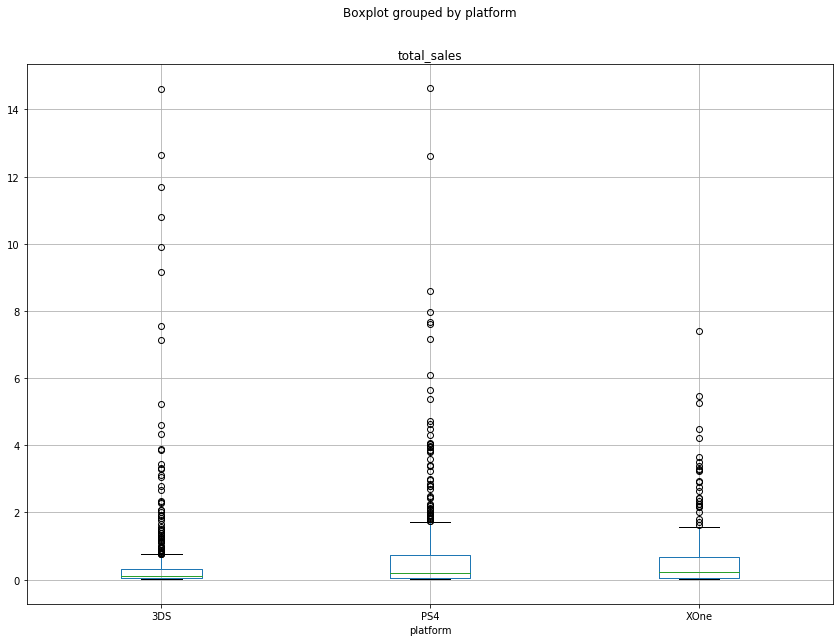

In [31]:
relevant_platforms.boxplot('total_sales', by="platform", figsize=(14,10)) #построение диграмм размаха

<font color='blue'> Для ящиков можно было удалить выбросы (showfliers=False), чтоб было нагляднее. </font>

У трех платформ наблюдается общая черта: большое количество высокодоходных продаж, смещающих медиану ниже среднего.

In [32]:
#сводная таблица по параметрам продаж с разбивкой на актуальные платформы
pivot_sales=relevant_platforms.pivot_table(index='platform', values='total_sales', aggfunc=['sum', 'mean', 'median', 'count'])
pivot_sales.columns = ['sum_sales', 'mean_sales', 'median_sales', 'count_sales']
pivot_sales.sort_values(by='sum_sales', ascending=False)

,sum_sales,mean_sales,median_sales,count_sales
platform,,,,
PS4,314.14,0.801378,0.20,392
3DS,259.00,0.498077,0.12,520
XOne,159.32,0.645020,0.22,247


У PS4 наибольшая сумма продаж и наибольшее среднее.

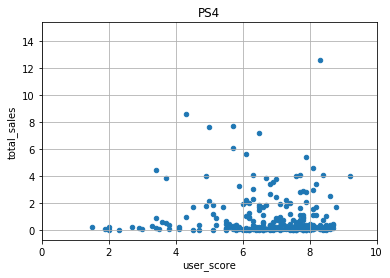

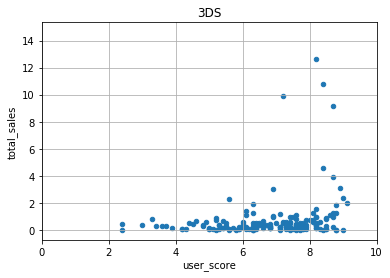

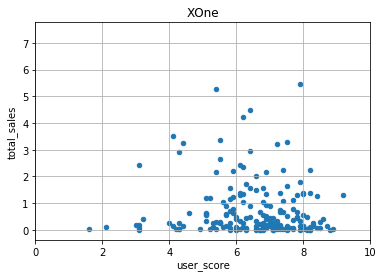

In [33]:
h=['PS4', '3DS', 'XOne'] #построение диаграммы рассеяния для топ-3 платформ с помощью цыкла 
for name in h:
    b = (data
    .loc[data.loc[:, 'platform'] == name]
    )
    b.plot(title=name, x='user_score', y='total_sales', kind='scatter', grid=True, xlim=(0,10))
    


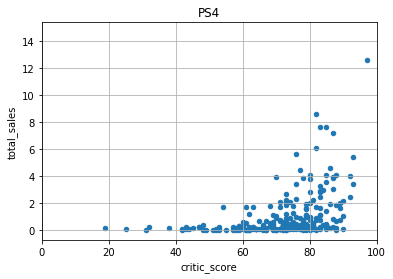

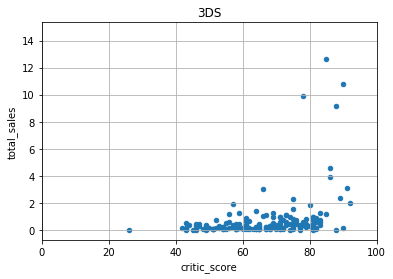

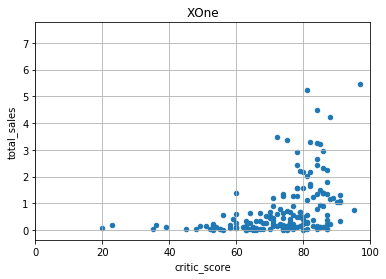

In [34]:
h=['PS4', '3DS', 'XOne'] #построение диаграммы рассеяния для топ-3 платформ с помощью цыкла 
for name in h:
    b = (data
    .loc[data.loc[:, 'platform'] == name]
    )
    b.plot(title=name, x='critic_score', y='total_sales', kind='scatter', grid=True, xlim=(0, 100))

In [35]:
#исключим значения -1 (маркеры) и построим таблицу корреляции для всех платформ
relevant_platforms_corr=relevant_platforms.query(('critic_score != -1')and('user_score != -1')) 
relevant_platforms_corr[['total_sales', 'critic_score', 'user_score']].corr().style.background_gradient(cmap = 'coolwarm')

,total_sales,critic_score,user_score
total_sales,1,0.3028,0.0444671
critic_score,0.3028,1,0.369427
user_score,0.0444671,0.369427,1


Для отдельных продаж роль user_score имеет высокую корреляцию, но для большинства значение user_score не велико.
Общая корреляция critic_score и продаж имеет существенное значение (0,3).

<font color='blue'> Хорошо, корреляция проанализирована верно. </font>

In [36]:
relevant_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,-1,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,-1,14.60
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,-1,11.68
...,...,...,...,...,...,...,...,...,...,...,...,...
16182,Rocksmith 2014 Edition Remastered,XOne,2016,Misc,0.01,0.00,0.00,0.00,-1.0,-1.0,T,0.01
16175,Psycho-Pass,XOne,2014,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01
16174,50 Classic Games,3DS,2012,Misc,0.00,0.01,0.00,0.00,-1.0,-1.0,-1,0.01
16155,Kaitou Joker: Toki o Koeru Kaitou to Ushinawar...,3DS,2015,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01


In [37]:
# составим сводную таблицу количества игр и продаж с разбивкой на жанры
genres_table = relevant_platforms.groupby('genre').agg({'name':['count'],'total_sales':['sum']}) 
genres_table.columns = ['count_games', 'total_sales'] # переименуем столбцы

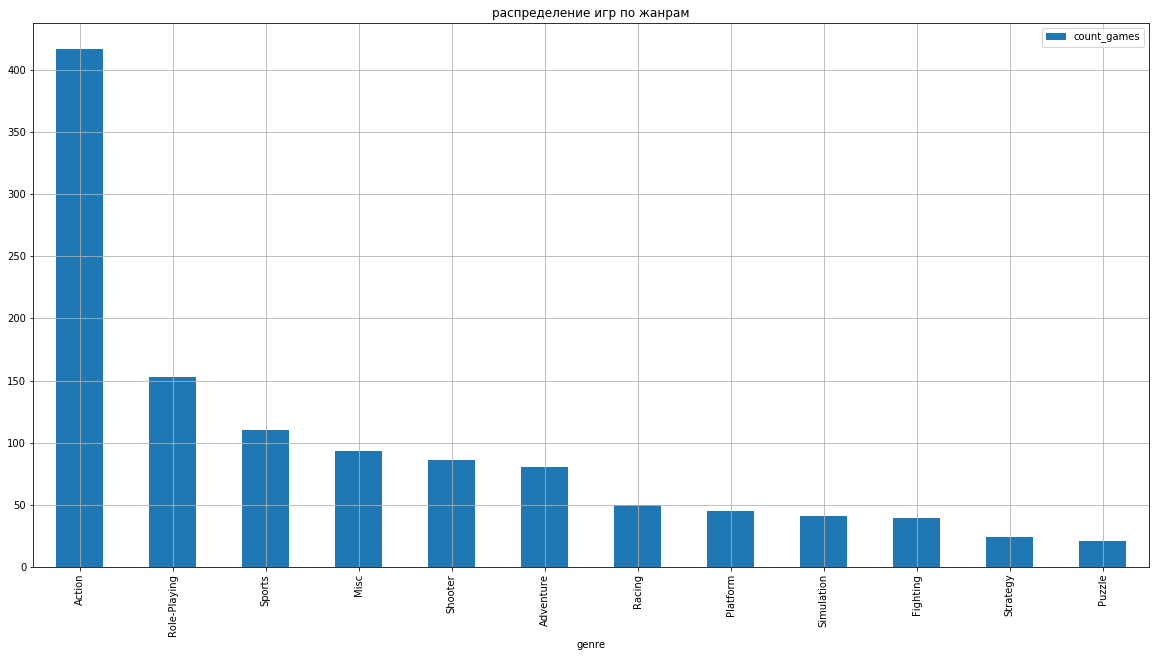

In [38]:
(genres_table #построим столбчаный график распределения игр по жанрам
    .sort_values(by = 'count_games', ascending = False)
    .plot(title='распределение игр по жанрам', y='count_games', style='o-', figsize=(20,10), grid=True, kind='bar' )
)

In [39]:
genres_table.sort_values(by = 'count_games', ascending = False)['count_games']

genre
Action          417
Role-Playing    153
Sports          110
Misc             93
Shooter          86
Adventure        80
Racing           50
Platform         45
Simulation       41
Fighting         39
Strategy         24
Puzzle           21
Name: count_games, dtype: int64

Самым распространенным жанром является Action. Прочих жанров в разы меньше.

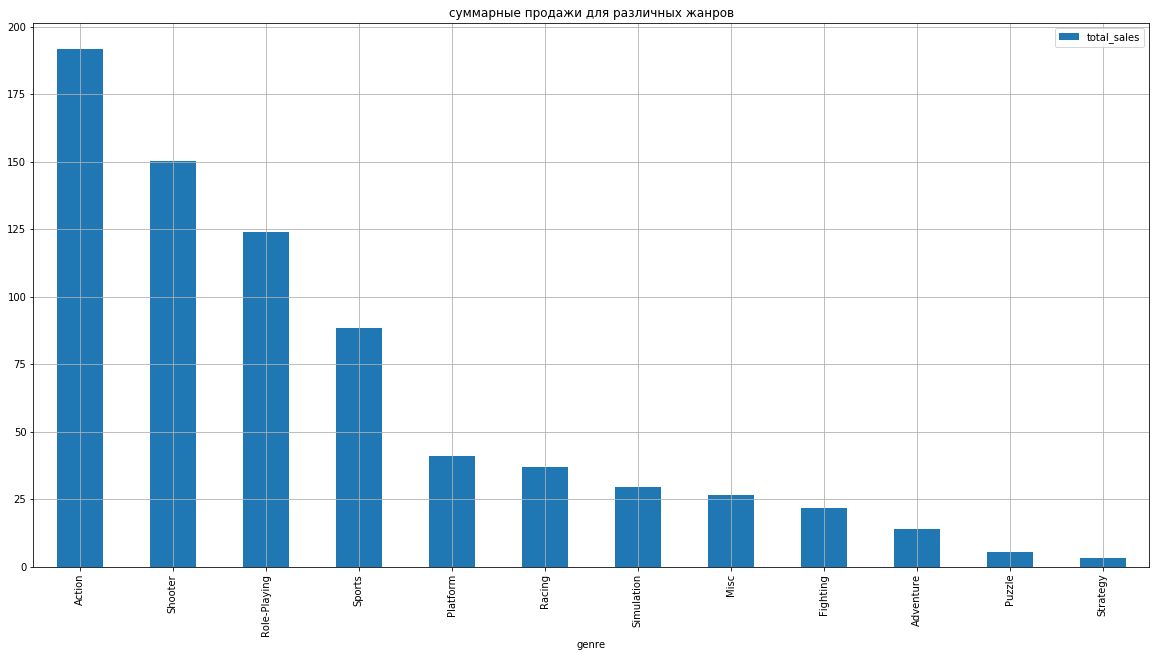

In [40]:
(genres_table #построим столбчаный график распределения продаж по жанрам
    .sort_values(by = 'total_sales', ascending = False)
    .plot(title='суммарные продажи для различных жанров', y='total_sales', style='o-', figsize=(20,10), grid=True, kind='bar' )
)

In [41]:
# список жанров, упорядоченный по убыванию прибыли
genres_table.sort_values(by = 'total_sales', ascending = False)['total_sales'] 

genre
Action          191.65
Shooter         150.18
Role-Playing    123.77
Sports           88.52
Platform         41.15
Racing           36.89
Simulation       29.37
Misc             26.61
Fighting         21.66
Adventure        13.94
Puzzle            5.59
Strategy          3.13
Name: total_sales, dtype: float64

Самым прибыльным жанром является Action, минимальные продажи у Strategy.

In [42]:
genres_table['mean_sales']=genres_table['total_sales']/genres_table['count_games'] 

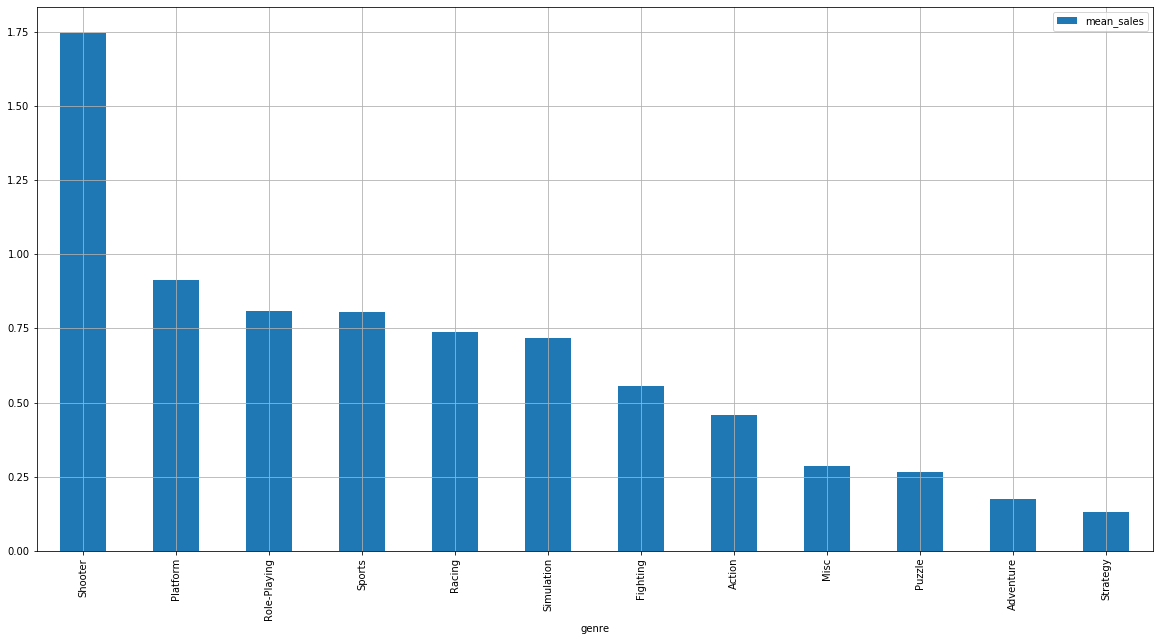

In [43]:
(genres_table
    .sort_values(by = 'mean_sales', ascending = False)
    .plot(y='mean_sales', style='o-', figsize=(20,10), grid=True, kind='bar' )
)

In [44]:
genres_table.sort_values(by = 'mean_sales', ascending = False)['mean_sales']

genre
Shooter         1.746279
Platform        0.914444
Role-Playing    0.808954
Sports          0.804727
Racing          0.737800
Simulation      0.716341
Fighting        0.555385
Action          0.459592
Misc            0.286129
Puzzle          0.266190
Adventure       0.174250
Strategy        0.130417
Name: mean_sales, dtype: float64

При относительно небольшом количестве игр в жанре Shooter, он обеспечивает второй результат по глобальным продажам. Это свидетельствует о высоком потенциале жанра Shooter.

<font color='blue'> Жанры выделены правильно. </font>

## Вывод

Максимальное количество игр выходило в 2008, 2009 годах. Наблюдаем дальнейших спад, предположительно связаный с мировым кризисом 2008 года и замедлением роста мировой экономики. 

Период с 2012 по 2016 годов число игр почти не меняется. Что может говорить о том, что в интересующем нас 2017г больших изменений не будет.

С 2015 по 2016 снижение падение продаж по всем платформам. **Актуальный период выберем с 2015 по 2016 годы.**

**Платформы ``PS4, XOne, 3DS`` являются самыми прибыльными за актуальный период (2015-2016) и обладают наибольшим  потенциалом высокой прибыльности в 2017 году.**

Корреляция critic_score и продаж имеет существенное значение (0,3).

Самым распространенным жанром является Action. Прочих жанров в разы меньше.

При относительно небольшом количестве игр в жанре Shooter, он обеспечивает второй результат по глобальным продажам. Это свидетельствует о высоком потенциале жанра Shooter.

## 4.  Особенности рынка компьютерных игр Северной Америки, Европы и Японии (портрет пользователя каждого региона)

In [45]:
# составим сводную таблицу продаж по регионам с разбивкой на платформы
reg_sales_platform = relevant_period.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], 
                                                aggfunc='sum')                                           
# сводная таблица продаж игр разбивкой на регионы по жанрам
reg_sales_genres = relevant_period.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'],
                                              aggfunc='sum')
# сводная таблица продаж игр определенных рейтингов в каждом из 3 регионов
reg_sales_rating = relevant_period.query('~(rating==-1)').pivot_table(index='rating',
                                                                        values=['na_sales', 'eu_sales', 'jp_sales'])

Топ-5 платформ для Северной Америки
platform
PS4     63.86
XOne    50.30
3DS     10.31
WiiU     8.86
X360     8.05
Name: na_sales, dtype: float64

Топ-5 жанров для Северной Америки
genre
Shooter         48.18
Action          33.68
Sports          26.31
Role-Playing    19.82
Misc             5.58
Name: na_sales, dtype: float64

Продажи по категориям рейтинга для Северной Америки
rating
-1      0.072982
E       0.173791
E10+    0.176931
M       0.315638
T       0.119063
Name: na_sales, dtype: float64


Text(0.5, 1.0, 'продажи игр в Северной Америке по рейтингам ESRB (2015-2016 годы)')

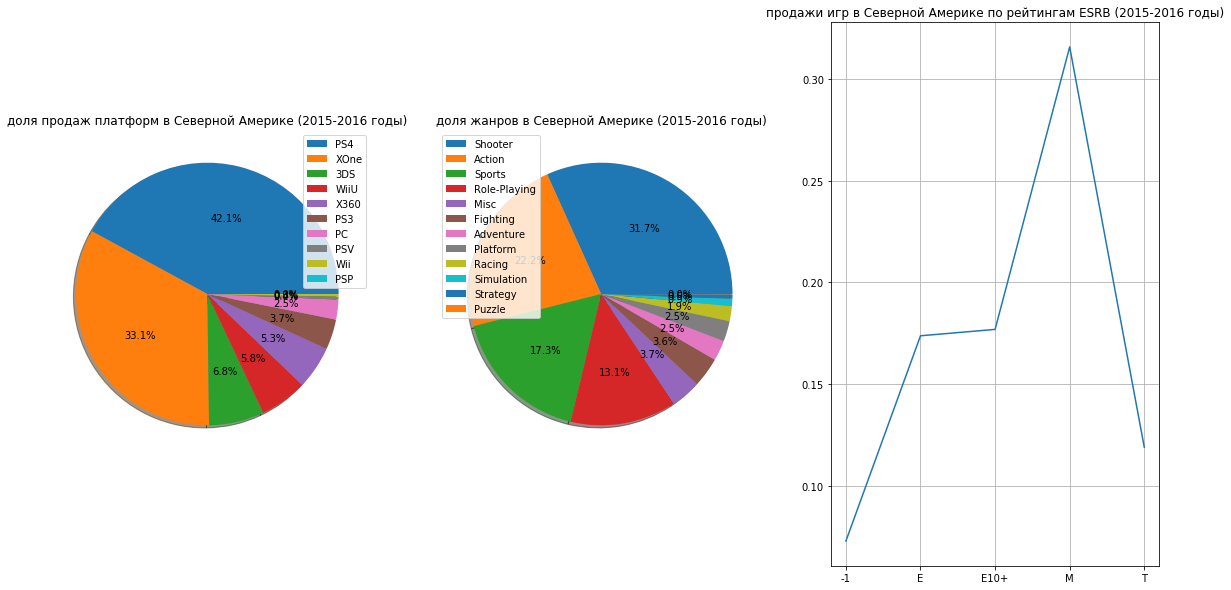

In [46]:
# Портрет пользователя для Северной Америки
# выделим в отдельную таблицу топ-5 платформ для Северной Америки
na_top5_platforms = reg_sales_platform.sort_values(by='na_sales', ascending=False)['na_sales']
print('Топ-5 платформ для Северной Америки')
print(na_top5_platforms.head())
# выделим в отдельную таблицу топ-5 жанров для Северной Америки
na_genre = reg_sales_genres.sort_values(by='na_sales', ascending=False)['na_sales']
print()
print('Топ-5 жанров для Северной Америки')
print(na_genre.head())
# продажи по рейтингу в Северной Америке
na_rating = reg_sales_rating['na_sales']
print()
print('Продажи по категориям рейтинга для Северной Америки')
print(na_rating)
# построим графики по данным в таблицах выше
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 10)) # создаем фигрру из 3 элементов
ax1.pie(na_top5_platforms, autopct='%1.1f%%', shadow=True) # строим первый элемент по топ-5 платформ
ax1.set_title('доля продаж платформ в Северной Америке (2015-2016 годы)') # подписываем график
ax1.legend(na_top5_platforms.index) # обозначаем легенду
ax2.pie(na_genre, autopct='%1.1f%%', shadow=True) # строим второй элемент по топ-5 жанров
ax2.set_title('доля жанров в Северной Америке (2015-2016 годы)') # подписываем график
ax2.legend(na_genre.index) # обозначаем легенду
ax3.plot(na_rating) # строим третий элемент по продажам по рейтингам
ax3.grid(True)
ax3.set_title('продажи игр в Северной Америке по рейтингам ESRB (2015-2016 годы)') 

- Топ-5 платформ в Северной Америке (2015-2016 годы): PS4, XOne, 3DS, WiiU, X360 
- Топ-5 жанров в Северной Америке (2015-2016 годы): Shooter, Action, Sports, Role-Playing, Misc 
- Рейтинг ESRB в Северной Америке (2015-2016 годы). Игры c рейтингом M (возраст 17+) имеют самые высокие продажи, самые низкие у T(возраст 13+)

Топ-5 платформ для Европы
platform
PS4     83.54
XOne    28.10
PC       9.10
3DS      7.39
PS3      7.30
Name: eu_sales, dtype: float64

Топ-5 жанров для Европы
genre
Shooter         40.28
Action          34.82
Sports          27.82
Role-Playing    17.21
Racing           6.52
Name: eu_sales, dtype: float64

Продажи по категориям рейтинга для Европы
rating
-1      0.069610
E       0.227647
E10+    0.114257
M       0.305638
T       0.105833
Name: eu_sales, dtype: float64


Text(0.5, 1.0, 'продажи игр в Европе по рейтингам ESRB (2015-2016 годы)')

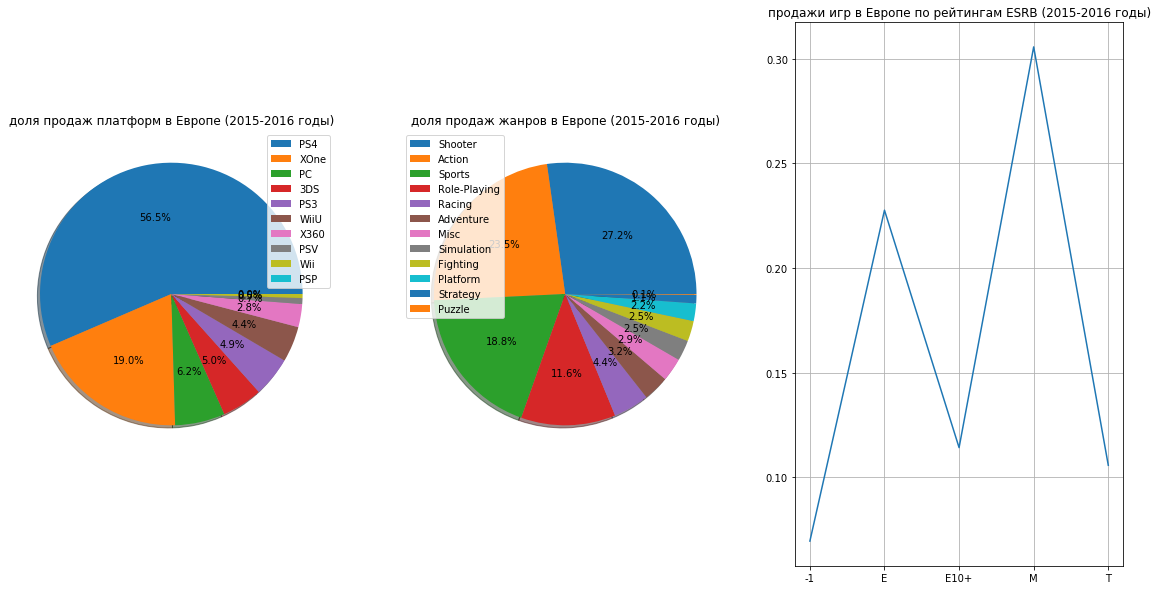

In [47]:
# Портрет пользователя для Европы
# выделим в отдельную таблицу топ-5 платформ для Европы
eu_top5_platforms = reg_sales_platform.sort_values(by='eu_sales', ascending=False)['eu_sales']
print('Топ-5 платформ для Европы')
print(eu_top5_platforms.head())
# выделим в отдельную таблицу топ-5 жанров для Европы
eu_genre = reg_sales_genres.sort_values(by='eu_sales', ascending=False)['eu_sales']
print()
print('Топ-5 жанров для Европы')
print(eu_genre.head()) 
# продажи по рейтингу в регионе для Европы
eu_rating = reg_sales_rating['eu_sales']
print()
print('Продажи по категориям рейтинга для Европы')
print(eu_rating)
# построим графики по данным в таблицах выше
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 10)) # создаем фигрру из 3 элементов
ax1.pie(eu_top5_platforms, autopct='%1.1f%%', shadow=True) # строим первый элемент по топ-5 платформ
ax1.set_title('доля продаж платформ в Европе (2015-2016 годы)') # подписываем график
ax1.legend(eu_top5_platforms.index) # обозначаем легенду
ax2.pie(eu_genre, autopct='%1.1f%%', shadow=True) # строим второй элемент по топ-5 жанров
ax2.set_title('доля продаж жанров в Европе (2015-2016 годы)') # подписываем график
ax2.legend(eu_genre.index) # обозначаем легенду
ax3.plot(eu_rating) # строим третий элемент по продажам по рейтингам
ax3.grid(True)
ax3.set_title('продажи игр в Европе по рейтингам ESRB (2015-2016 годы)') 

- Топ-5 платформ в Европе (2015-2016 годы): PS4, XOne, PC, 3DS, PS3
- Топ-5 жанров в Европе (2015-2016 годы): Shooter, Action, Sports, Role-Playing, Racing 
- Рейтинг ESRB в Европе (2015-2016 годы). Игры c рейтингом M (возраст 17+) имеют самые высокие продажи, самые низкие у T (возраст 13+) и E10+(возраст 10+)

Топ-5 платформ для Японии
platform
3DS     23.55
PS4     12.05
PSV      8.41
PS3      4.97
WiiU     4.12
Name: jp_sales, dtype: float64

Топ-5 жанров для Японии
genre
Action          23.05
Role-Playing    13.41
Shooter          3.79
Misc             3.19
Adventure        2.22
Name: jp_sales, dtype: float64

Продажи по категориям рейтинга для Японии
rating
-1      0.064113
E       0.034314
E10+    0.032376
M       0.028792
T       0.040104
Name: jp_sales, dtype: float64


Text(0.5, 1.0, 'продажи игр в Японии по рейтингам ESRB (2015-2016 годы)')

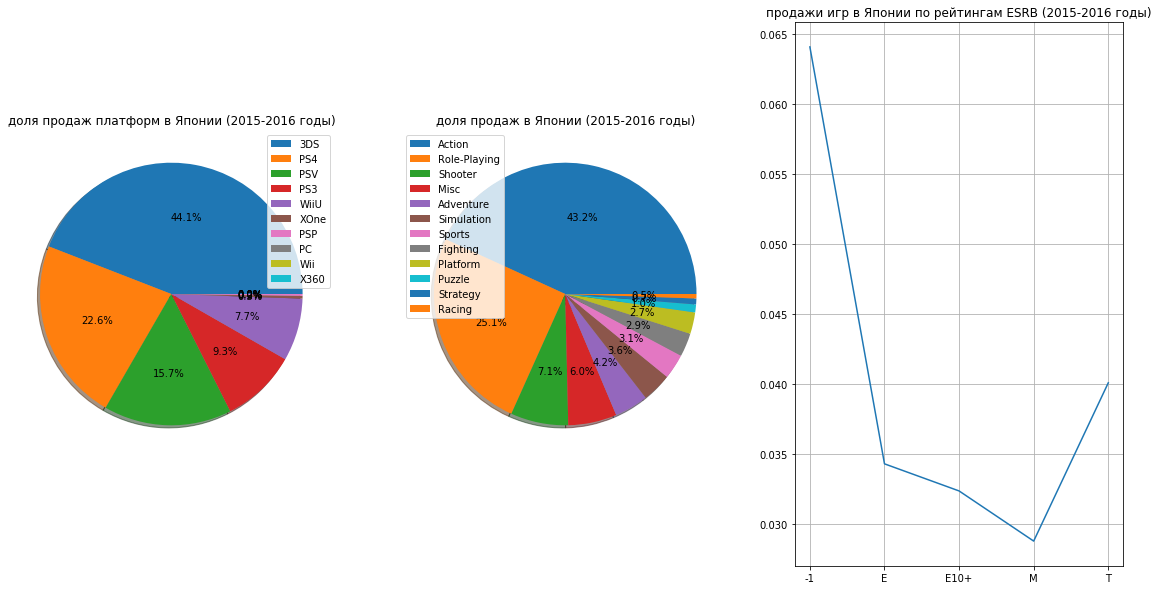

In [48]:
# Портрет пользователя для Японии
# выделим в отдельную таблицу топ-5 платформ для Японии
jp_top5_platforms = reg_sales_platform.sort_values(by='jp_sales', ascending=False)['jp_sales']
print('Топ-5 платформ для Японии')
print(jp_top5_platforms.head())
# выделим в отдельную таблицу топ-5 жанров для Северной Америки
jp_genre = reg_sales_genres.sort_values(by='jp_sales', ascending=False)['jp_sales']
print()
print('Топ-5 жанров для Японии')
print(jp_genre.head())
# продажи по рейтингу в Северной Америке
jp_rating = reg_sales_rating['jp_sales']
print()
print('Продажи по категориям рейтинга для Японии')
print(jp_rating)
# построим графики по данным в таблицах выше
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 10)) # создаем фигрру из 3 элементов
ax1.pie(jp_top5_platforms, autopct='%1.1f%%', shadow=True) # строим первый элемент по топ-5 платформ
ax1.set_title('доля продаж платформ в Японии (2015-2016 годы)') # подписываем график
ax1.legend(jp_top5_platforms.index) # обозначаем легенду
ax2.pie(jp_genre, autopct='%1.1f%%', shadow=True) # строим второй элемент по топ-5 жанров
ax2.set_title('доля продаж в Японии (2015-2016 годы)') # подписываем график
ax2.legend(jp_genre.index) # обозначаем легенду
ax3.plot(jp_rating) # строим третий элемент по продажам по рейтингам
ax3.grid(True)
ax3.set_title('продажи игр в Японии по рейтингам ESRB (2015-2016 годы)') 

- Топ-5 платформ в Японии за 2015-2016 (2015-2016 годы): DS, PS, PS2, SNES, 3DS
- Топ-5 жанров в Японии за 2015-2016 (2015-2016 годы): DS, PS, PS2, SNES, 3DS
- Рейтинг ESRB в Японии (2015-2016 годы). Игры c рейтингом T (возраст 13+) имеют самые высокие продажи, самые низкие у E10+(возраст 10+)

## Вывод

- Топ-5 платформ в Северной Америке (2015-2016 годы): PS4, XOne, 3DS, WiiU, X360; 
- Топ-5 жанров в Северной Америке (2015-2016 годы): Shooter, Action, Sports, Role-Playing, Misc;
- Рейтинг ESRB в Северной Америке (2015-2016 годы). Игры c рейтингом M (возраст 17+) имеют самые высокие продажи, самые низкие у T (возраст 13+).


- Топ-5 платформ в Европе (2015-2016 годы): PS4, XOne, PC, 3DS, PS3;
- Топ-5 жанров в Европе (2015-2016 годы): Shooter, Action, Sports, Role-Playing, Racing; 
- Рейтинг ESRB в Европе (2015-2016 годы). Игры c рейтингом M (возраст 17+) имеют самые высокие продажи, самые низкие у T (возраст 13+) и E10+(возраст 10+).


- Топ-5 платформ в Японии за 2015-2016 (2015-2016 годы): DS, PS, PS2, SNES, 3DS;
- Топ-5 жанров в Японии за 2015-2016 (2015-2016 годы): Action, Role-Playing, Shooter, Misc, Adventure;
- Рейтинг ESRB в Японии (2015-2016 годы). Игры c рейтингом T (возраст 13+) имеют самые высокие продажи, самые низкие у E10+(возраст 10+).


<font color='blue'> Портрет пользователя получен правильно. Хорошо, что ты написал общие выводы. </font>

## 5. Проверка гипотез

Проверка гипотезы: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". Примем ее качестве нулевой гипотезы H₀. Альтернативная гипотеза H₁: "средние не равны."

In [49]:
relevant_period_cut=relevant_period.query(('user_score != -1')and('user_score != -1'))

In [50]:
alpha = 0.05
a = relevant_period_cut.query('platform == "PC"')['user_score']
b = relevant_period_cut.query('platform == "XOne"')['user_score']
results =  st.ttest_ind(a, b) #проверка гипотезы о равенстве средних двух независимых совокупностей
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print(results.statistic, results.pvalue)
stde1 = np.std(a) / (len(a))**0.5
print('Среднее', a.mean(), 'Нижняя граница', a.mean()-stde1, 'Нижняя граница', a.mean()+stde1)
stde2 = np.std(b) / (len(a))**0.5
print('Среднее', b.mean(), 'Нижняя граница', b.mean()-stde2, 'Нижняя граница', b.mean()+stde2)

Не получилось отвергнуть нулевую гипотезу
-1.088070274037042 0.2778542084733835
Среднее 6.29642857142857 Нижняя граница 6.10513237201873 Нижняя граница 6.48772477083841
Среднее 6.542148760330578 Нижняя граница 6.383725597266369 Нижняя граница 6.700571923394787


Проверка гипотезы: "Средние пользовательские рейтинги жанров Action и Sports разные.". Примем в качестве нулевой гипотезы H₀: "средние пользовательские рейтинги жанров Action и Sports равные". Альтернативная гипотеза H₁: "средние не равны."

In [51]:
alpha = 0.05
a = relevant_period_cut.query('genre == "Action"')['user_score']
b = relevant_period_cut.query('genre == "Sports"')['user_score']
results =  st.ttest_ind(a, b) #проверка гипотезы о равенстве средних двух независимых совокупностей
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print(results.statistic, results.pvalue)
stde1 = np.std(a) / (len(a))**0.5
print('Среднее', a.mean(), 'Нижняя граница', a.mean()-stde1, 'Нижняя граница', a.mean()+stde1)
stde2 = np.std(b) / (len(a))**0.5
print('Среднее', b.mean(), 'Нижняя граница', b.mean()-stde2, 'Нижняя граница', b.mean()+stde2)

Отвергаем нулевую гипотезу
7.842209482377116 1.0012846807938657e-13
Среднее 6.808290155440415 Нижняя граница 6.711618555931236 Нижняя граница 6.904961754949594
Среднее 5.198780487804878 Нижняя граница 5.057997289634083 Нижняя граница 5.339563685975672


## Вывод

В результате применения Т-теста подтвердились  следующие гипотезы:
    
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

<font color='blue'> Гипотезы сформулированы и проверены правильно. </font>

## 6. Общий вывод

- С 2015 по 2016 происходит снижение продаж по всем платформам, что ограничивает ожидания на 2017 год;

- Платформы ``PS4, XOne, 3DS`` являются самыми прибыльными за актуальный период (2015-2016) и обладают наибольшим  потенциалом высокой прибыльности в 2017 году;

- Самым распространенным и прибыльным жанром является Action;

- Наибольший потенциал высокой доходности в 2017 году у жанра Shooter.

Рекламная кампанию стоит уделить жанру Shooter, поскольку он не достаточно широко представлен на глобальном рынке (5 место), при этом обеспечивает вторые после Action продажи.

<font color='blue'> Проект выполнен отлично. Так держать, удачи в следующих модулях. </font>